#**E-Commerce: Qué categoría se vende más?**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [ ]:
!pip install mlxtend
!pip install scikit-learn

In [ ]:
!pip install pandas-profiling

##**Objetivo: Predecir el crecimiento de las distintas categorías de venta en Ecommerce**

**Contexto empresarial**: Usted es analísta en una empresa E-commerce. Su equipo se especializa en analizar y detectar nuevas oportunidades de negocios dentro de las distintas categorías de venta en Ecommerce.

**Problema comercial**: Su tarea es crear un modelo para predecir el crecimiento de las distintas categorías de productos en Ecommerce y nuevos nichos de mercado.

**Contexto analítico**: El archivo **"Us-Ecommerce Dataset.csv"** contiene  datos de transacciones en Ecommerce de diferentes categorías EE.UU

El caso procederá de la siguiente manera:
 1) analizará los datos actuales y evaluará deficiencias
 2) extraer los datos y limpiar el dataset
 3)finalmente se creará el modelo predictivo.

**Hipótesis:**

**Hipotesis nula:** No hay diferencia en caunto a facturación entre las distintas categorías analizadas.

**Hipotesis 1:** El género femenino consume en mayor cantidad las categorias de ropa y accesorios mientras que el masculino prefiere los productos de electrónica.

**Hipotesis 2:** La categoría de ropa es la que más se vende respecto a las otras categorías a analizar.

**Hipotesis 3:** Los clientes prefieren los envíos en el día.

**Hipotesis 4:**En epocas de fiestas (naidad, año nuevo, reyes), se generan picos de ventas en el comercio electrónico.

#Importación de DataFrame y Análisis Exploratorio de datos

In [ ]:
url='https://raw.githubusercontent.com/sofy1208/dataset/07db3d458906d6eb59629722fee70dfdae8df0be/Us-Ecommerce%20Dataset.csv'
dataframe = pd.read_csv(url,sep=',')
print(dataframe)

       Transaction_id  customer_id        Date    Product  Gender Device_Type  \
0               40170   1348959766  14/11/2013  Hair Band  Female         Web   
1               33374   2213674919  05/11/2013  Hair Band  Female         Web   
2               14407   1809450308  01/10/2013  Hair Band  Female         Web   
3               15472   1691227134  04/10/2013  Hair Band  Female         Web   
4               18709   2290737237  12/10/2013  Hair Band  Female         Web   
...               ...          ...         ...        ...     ...         ...   
65530           67031   1266148699  13/12/2013      Shoes  Female      Mobile   
65531           67043   2282461907  13/12/2013      Shoes  Female      Mobile   
65532           67045   1367012613  13/12/2013      Shoes  Female      Mobile   
65533           67150   1192845373  13/12/2013      Shoes  Female      Mobile   
65534           67181   2063357887  13/12/2013      Shoes  Female      Mobile   

             Country       

**Descripción de las categorías:**
#####1) **Accessories:** Incluye variedad de productos como joyas, lentes de sol, bolsos y carteras, relojes, cinturones, etc
#####2) **Clothing:** Incluye ropa tanto masculina como femenína
#####3) **Fashion:** Incluye tanto ropa como zapatos, y accesorios de moda, esta categoría incluye productos que son tendencia.
#####4) **Electronics:** Incluiye dispositivos electrónicos
#####5) **Stationaries:** Incluye productos de librería y útiles de escritorio
#####6) **Wearables:** Incluye productos electrónicos portables como smartwatches, Smartglasses, smartbands, etc
#####7) **House Hold:** Incluye articulos para el hogar en general como blanquería, utensillos de cocina, articulos para baño, articulos de limpieza y cuidados, etc
#####8) **Vehicle:** Vehículos

In [ ]:
dataframe.info() #chequeo los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction_id        65535 non-null  int64 
 1   customer_id           65535 non-null  int64 
 2   Date                  65535 non-null  object
 3   Product               65535 non-null  object
 4   Gender                65535 non-null  object
 5   Device_Type           65535 non-null  object
 6   Country               65535 non-null  object
 7   State                 65535 non-null  object
 8   City                  65535 non-null  object
 9   Category              65535 non-null  object
 10  Customer_Login_type   65535 non-null  object
 11  Delivery_Type         65535 non-null  object
 12   Quantity             65535 non-null  int64 
 13  Transaction Start     65535 non-null  int64 
 14  Transaction_Result    65535 non-null  int64 
 15  Amount US$            65534 non-null

De las variables que presenta el dataset podemos determinar como **medidas** de interés para el proyecto a Quantity, Amount US$ e Individual_price.
Las variables **descriptivas** de interés serían Product, Gender, State, Category y Delivery_Type

In [ ]:
label_encoder = LabelEncoder()
categorical_columns = ['Amount US$' , 'Individual_Price_US$']
for col in categorical_columns:
    dataframe[col] = label_encoder.fit_transform(dataframe[col]) ##convierte los datos objeto en String

In [ ]:
print(dataframe.isnull()) #verifico si hay valores nulos

       Transaction_id  customer_id   Date  Product  Gender  Device_Type  \
0               False        False  False    False   False        False   
1               False        False  False    False   False        False   
2               False        False  False    False   False        False   
3               False        False  False    False   False        False   
4               False        False  False    False   False        False   
...               ...          ...    ...      ...     ...          ...   
65530           False        False  False    False   False        False   
65531           False        False  False    False   False        False   
65532           False        False  False    False   False        False   
65533           False        False  False    False   False        False   
65534           False        False  False    False   False        False   

       Country  State   City  Category  Customer_Login_type  Delivery_Type  \
0        False  False

In [ ]:
dataframe.describe() #Analisis estadìstico de los datos

,Transaction_id,customer_id,Quantity,Transaction Start,Transaction_Result,Amount US$,Individual_Price_US$
count,65535.000000,6.553500e+04,65535.000000,65535.0,65535.000000,65535.000000,65535.000000
mean,43933.318349,1.729511e+09,17.154299,1.0,0.867353,4607.831266,1247.527886
std,20980.667643,3.337308e+08,3.270824,0.0,0.339195,3665.759223,680.525773
min,10001.000000,1.152933e+09,12.000000,1.0,0.000000,0.000000,0.000000
25%,26384.500000,1.439080e+09,15.000000,1.0,1.000000,670.500000,809.000000
50%,42768.000000,1.726960e+09,17.000000,1.0,1.000000,4283.000000,1299.000000
75%,59151.500000,2.020097e+09,20.000000,1.0,1.000000,7767.000000,1801.500000
max,93437.000000,2.305789e+09,23.000000,1.0,1.000000,11310.000000,2386.000000


#**Análisis Univariado**

In [ ]:
dataframe.head(5)

,Transaction_id,customer_id,Date,Product,Gender,Device_Type,Country,State,City,Category,Customer_Login_type,Delivery_Type,Quantity,Transaction Start,Transaction_Result,Amount US$,Individual_Price_US$,Year_Month,Time
0,40170,1348959766,14/11/2013,Hair Band,Female,Web,United States,New York,New York City,Accessories,Member,one-day deliver,12,1,0,9248,1902,13-Nov,22:35:51
1,33374,2213674919,05/11/2013,Hair Band,Female,Web,United States,California,Los Angles,Accessories,Member,one-day deliver,17,1,1,744,773,13-Nov,06:44:41
2,14407,1809450308,01/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,7401,1252,13-Oct,00:41:24
3,15472,1691227134,04/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,0,10094,1520,13-Oct,22:04:03
4,18709,2290737237,12/10/2013,Hair Band,Female,Web,United States,Washington,Seattle,Accessories,Member,Normal Delivery,23,1,1,6913,873,13-Oct,15:00:46


###**¿Cuánto factura cada categoría?**

### Procedemos a realizar un gráfico de barra para visualizar las categorías de productos según la facturación percibida

In [ ]:
dataframe["Amount US$"] = pd.to_numeric(dataframe["Amount US$"], errors="coerce") #convierto el dato int en numérico para poder realizar los gráficos
gasto_por_categ = dataframe.groupby("Category")["Amount US$"].sum()
gasto_por_categ

Category
Accessories        202997
Clothing        110129965
Electronics       8089081
Fashion         144212842
House hold         100809
Vehicle              7920
stationaries     17670505
wearables        21560103
Name: Amount US$, dtype: int64

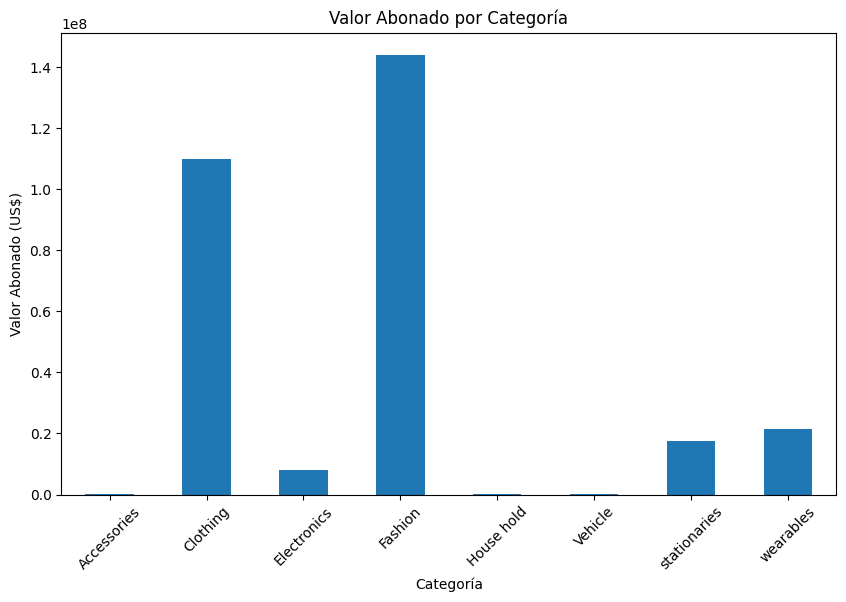

In [ ]:
plt.figure(figsize=(10, 6))
gasto_por_categ.plot(kind="bar")
plt.title("Valor Abonado por Categoría")
plt.ylabel("Valor Abonado (US$)")
plt.xlabel("Categoría")
plt.xticks(rotation=45)
plt.show()

###Del Gráfico de barras podemos determinar que fashion que contempla además de ropa, otros productos como zapatos, accesorios, joyas y carteras y ropa, son las categorías de productos que más se venden en e-commerce siendo las categorías que mayor facturación presentan, al ser datos de distintas páginas de ecommerce de estados unidos, algunos agrupan ropa en la categoría ropa y otras empresas colocan todos los productos en una única categoría catalogada como fashion.

###**¿Qué categorías venden más productos?**

###Realizamos un gráfico de torta para ver cuales son las categorías con más productos vendidos




In [ ]:
dataframe.columns = [column.strip() for column in dataframe.columns] #Limpio los espacios en blanco de los nombres de las columnas ya que no me reconoce la columna Quantity


In [ ]:
cant_por_categ = dataframe.groupby("Category")["Quantity"].sum()
cant_por_categ

Category
Accessories        871
Clothing        408688
Electronics      29487
Fashion         538878
House hold         336
Vehicle             14
stationaries     64741
wearables        81192
Name: Quantity, dtype: int64

In [ ]:
colores = ["#65F54C", "#FF5B57", "#54E8C3", "#FFA14F", "#4C94F5"] #Los ordeno de mayor a menor
efecto_explo = (0.1, 0, 0, 0,0)
sorted_cant_por_categ = cant_por_categ.sort_values(ascending=False)

top5_categorias = sorted_cant_por_categ[:5]

print(top5_categorias)

Category
Fashion         538878
Clothing        408688
wearables        81192
stationaries     64741
Electronics      29487
Name: Quantity, dtype: int64


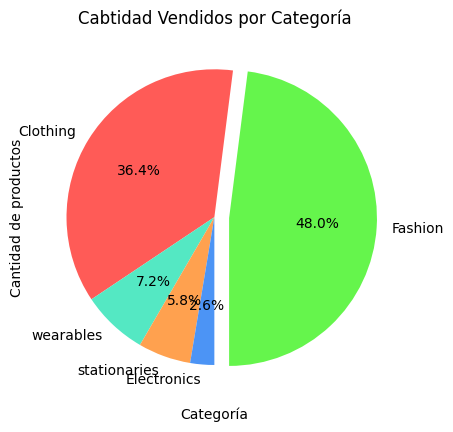

In [ ]:
fig, piechart = plt.subplots()
piechart.pie(top5_categorias, labels= top5_categorias.index, explode= efecto_explo, autopct='%1.1f%%', colors=colores,  startangle=-90)
plt.title('Cabtidad Vendidos por Categoría')
plt.ylabel('Cantidad de productos')
plt.xlabel('Categoría')
plt.show()

###Del gráfico podemos deducir que las categorías con más productos vendidos son la de ropa que incluye tanto ropa de masculina como femenina y la categoría fashion que refiere a ropa, zapatos, relojes, joyas, carteras y accesorios, confirmando los datos del gráfico anterior que muestra que es la categoría con mayor facturación y cantidades vendidas en e-commerce

###**¿Hay estacionalidad en las ventas?**

###Realizamos un grafico de línea para conocer la cantidad de ventas respecto a las fechas y poder determinar picos de ventas



In [ ]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
cant_fecha = dataframe.groupby("Date")["Quantity"].sum()
cant_fecha

<ipython-input-16-c8364a4e7fd5>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataframe["Date"] = pd.to_datetime(dataframe["Date"])


Date
2013-01-10     9034
2013-01-11    13266
2013-01-12    18178
2013-02-10     6366
2013-02-11    11302
              ...  
2014-08-01     3826
2014-09-01     3325
2014-10-01     4200
2014-11-01     3136
2014-12-01     3601
Name: Quantity, Length: 115, dtype: int64

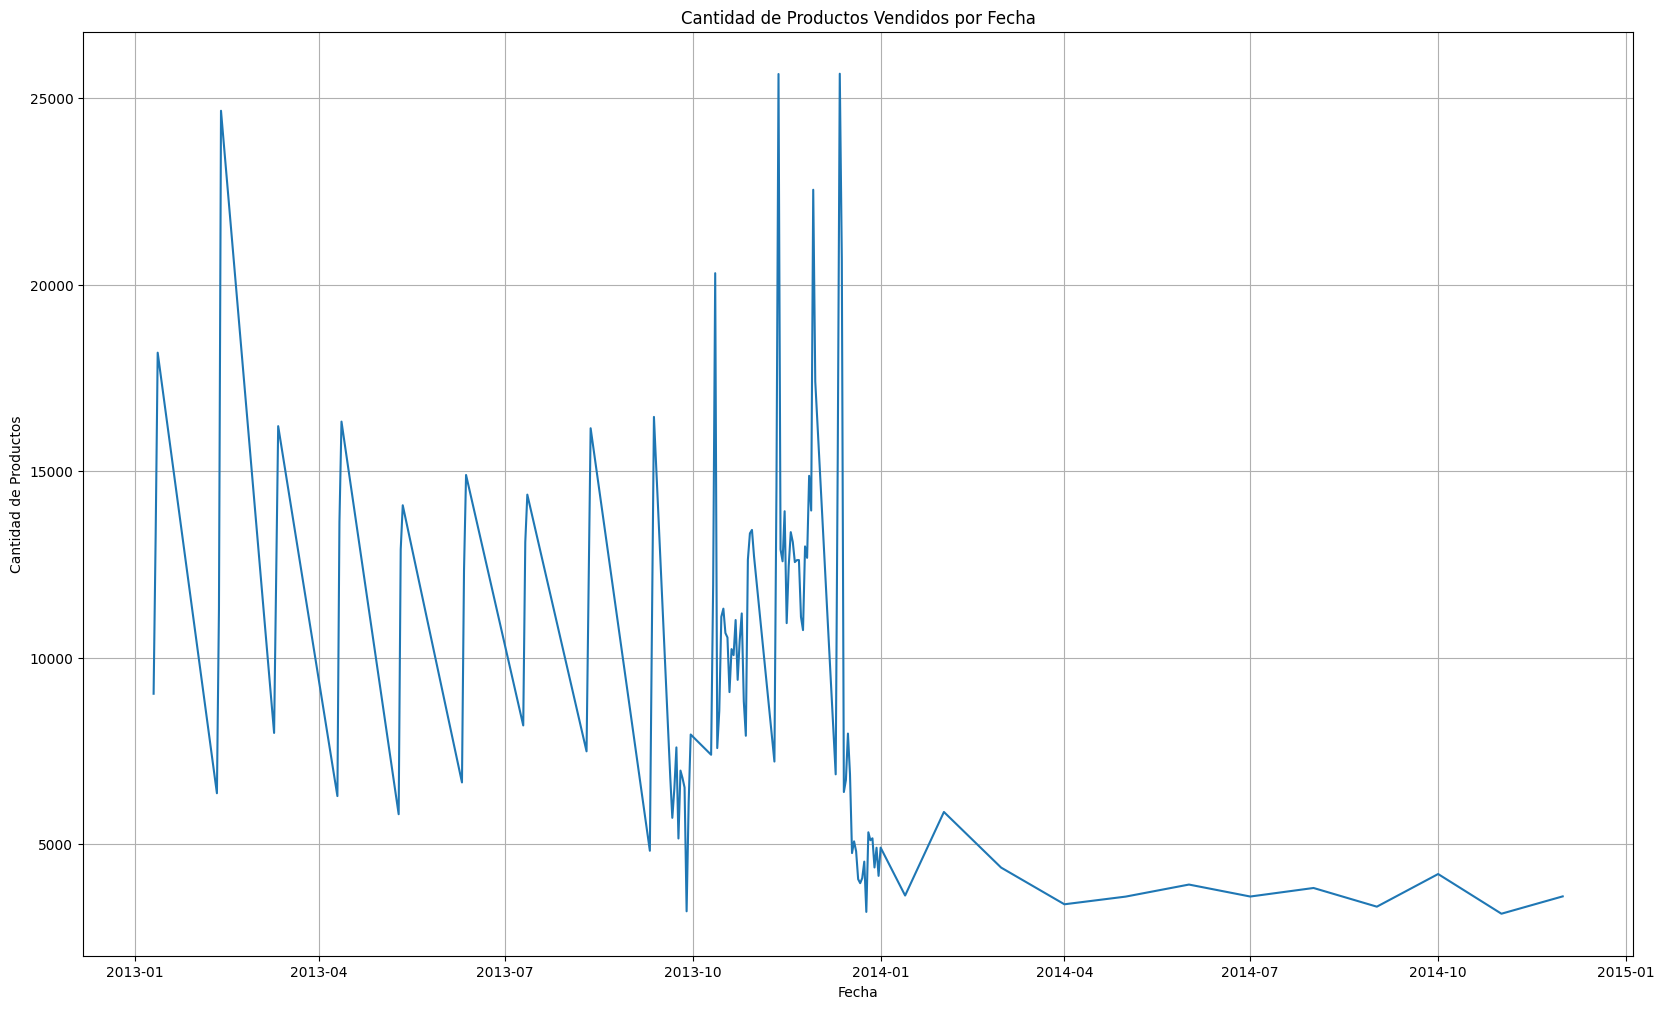

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(cant_fecha.index, cant_fecha.values, linestyle='-', markersize=5)

plt.title("Cantidad de Productos Vendidos por Fecha")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Productos")
plt.grid(True)

plt.show()

###Del gráfico podemos determinar picos fuertes de ventas entre enero y abril del 2013 y entre octubre-13 y enero-14 que pueden deberse a las fiestas (navidad y reyes).

###**¿Qué tipo de envío prefieren los clientes?**

###Gráfico Boxplot para conocer el tipo de envío respecto de las ventas


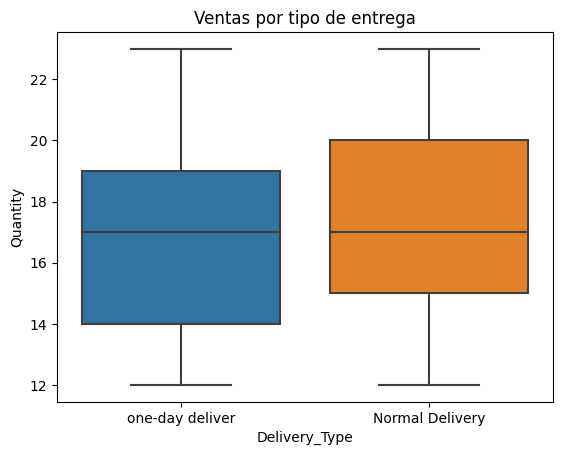

In [ ]:
sns.boxplot(data=dataframe, x='Delivery_Type', y='Quantity')
plt.title('Ventas por tipo de entrega')
plt.show()

###Este gráfico nos permite visualizar la distribución y dispersión de los datos de envío frente a las cantidades vendidas, también podemos visualizar que no se presentan outliers en el Dataset.
###No se evidencia una preferencia por los envíos en el día.

###**¿Cómo se distribuyen los precios por categoría?**

###Gráfico de violín para comparar la distribución de precios individuales por categoría:


In [ ]:
dataframe["Individual_Price_US$"] = pd.to_numeric(dataframe["Individual_Price_US$"], errors="coerce") #Convierto de objeto a numerico el tipo de dato

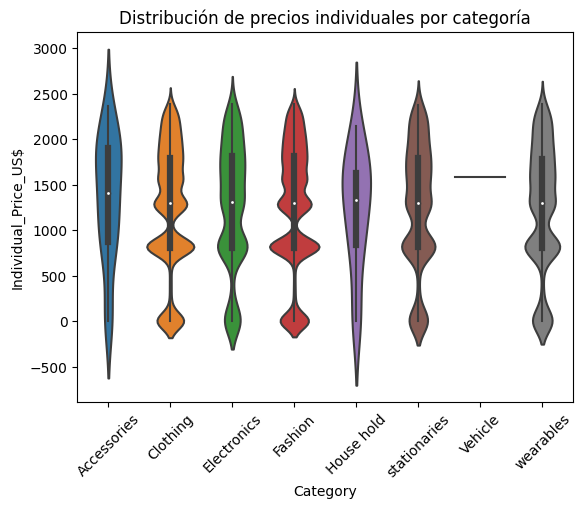

In [ ]:
sns.violinplot(data=dataframe, x='Category', y='Individual_Price_US$')
plt.xticks(rotation=45)
plt.title('Distribución de precios individuales por categoría')
plt.show()

###Del gráfico podemos deducir que la categoría Accessories y House Hold presentan mayor variabilidad de precios, la categoría Clothing y Fashion presentan una distribución de precios similar

#Análisis Bivariado:

###**¿Qué categoría prefiere cada género?**

###Gráfico de barras apiladas para comparar las ventas por categoría y género


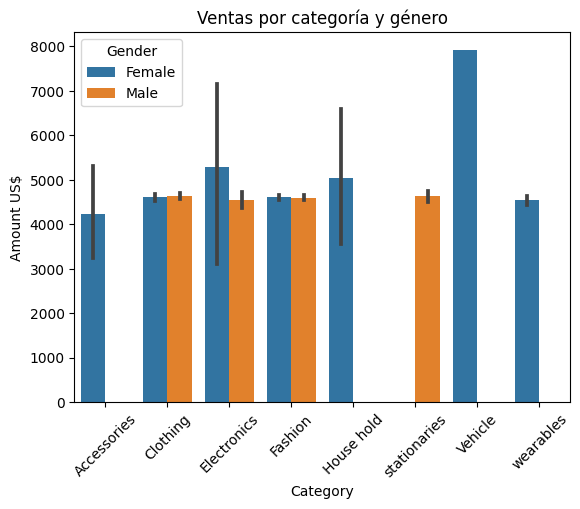

In [ ]:
sns.barplot(data=dataframe, x='Category', y='Amount US$', hue='Gender')
plt.xticks(rotation=45)
plt.title('Ventas por categoría y género')
plt.show()

Del gráfico y comparandolo con el gráfico de tortas realizado anteriormente,  podemos concluir que las mujeres gastan más en los rubros relacionados a moda, ropa, articulos para el hogar y electronicos, mientras que los hombres además del rubro ropa, compran más productos electrónicos y la categoría stationaries que incluye productos de papelería y útiles de escritorio.
La variable vehicle es la que mayor valor genera dado el valor del vehiculo que es superior a otros productos, aunque en el gráfico de torta realizado previamente, la cantidad vendida en esa categoría no es significante frente a otras.



#Data Profilling:
Visualizamos el reporte de los datos para obtener un análisis de mayor profundidad

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import os
from pandas_profiling import ProfileReport

ruta_del_archivo = "/content/drive/MyDrive/Carrera Data Science /Data Science/Proyecto final/Informe_Datos.html"

# Crear un objeto ProfileReport
profile = ProfileReport(dataframe)

# Generar el informe y guardar en la ubicación especificada
profile.to_file("/content/drive/MyDrive/Carrera Data Science /Data Science/Proyecto final/Informe_Datos.html")

<ipython-input-24-1ba3c0e42c8d>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:357: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn("Try running command: 'pip install --upgrade Pillow' to avoid ValueError")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile


Output hidden; open in https://colab.research.google.com to view.

###Feature Engineering: Algoritmos de Regresión

In [ ]:
df.info() #verifico que efectivamente no hayan valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Quantity              65535 non-null  int64
 1   Amount US$            65535 non-null  int64
 2   Individual_Price_US$  65535 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [ ]:
# Método de Forward Selection
sfs_forward = SFS(LinearRegression(),
                  k_features=2,
                  forward=True,
                  floating=False,
                  scoring='r2',
                  cv=3)
sfs_forward.fit(X, y)
selected_features_forward = sfs_forward.k_feature_names_
print("Forward Selection - Características seleccionadas:", selected_features_forward)

Forward Selection - Características seleccionadas: ('Quantity', 'Amount US$')


In [ ]:
df_y = y
print(df_y)

0        1902
1         773
2        1252
3        1520
4         873
         ... 
65530    1338
65531     871
65532    2340
65533    1603
65534     738
Name: Individual_Price_US$, Length: 65535, dtype: int64


In [ ]:
df_X = df[['Quantity', 'Amount US$']]
print(df_X)

       Quantity  Amount US$
0            12        9248
1            17         744
2            23        7401
3            23       10094
4            23        6913
...         ...         ...
65530        20        8357
65531        16        5264
65532        23        4629
65533        22       10502
65534        16        6181

[65535 rows x 2 columns]


In [ ]:
# Modelo de Regresión
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

MAE: 7.0420386053253985
MSE: 8845.787594415198
R^2: 0.98074815668157
RMSE: 94.05204726328502


  Conclusiones: El modelo de Regresión por Árboles de Decisión explica correctamente la variabilidad de los datos y el modelo tiene un buen rendimiento. El R^2 del 0.98 significa que explica el 98% de la variabilidad de los datos. El valor del MAE indica que las predicciones son cercanas a los valores reales. El MSE indica presición en las predicciones al igual que el RMSE.

#Feature Selecction

Analizamos y seleccionamos las características relevantes para el modelo de regresión.

In [ ]:
df = dataframe[['Quantity', 'Amount US$', 'Individual_Price_US$']] #Creo un nuevo dataframe con los datos relevantes para la regresión

In [ ]:
df.head()

,Quantity,Amount US$,Individual_Price_US$
0,12,9248,1902
1,17,744,773
2,23,7401,1252
3,23,10094,1520
4,23,6913,873


In [ ]:
#Preparo los datos
X = df.drop(columns=["Individual_Price_US$"])
y = df['Individual_Price_US$']
print(df.head)

<bound method NDFrame.head of        Quantity  Amount US$  Individual_Price_US$
0            12        9248                  1902
1            17         744                   773
2            23        7401                  1252
3            23       10094                  1520
4            23        6913                   873
...         ...         ...                   ...
65530        20        8357                  1338
65531        16        5264                   871
65532        23        4629                  2340
65533        22       10502                  1603
65534        16        6181                   738

[65535 rows x 3 columns]>


#Reducción de dimensionalidad: PCA
Realizo la técnica para conseguir patrones de correlación fuertes en nuestro modelo y mejorar la predicción de datos.


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Quantity              65535 non-null  int64
 1   Amount US$            65535 non-null  int64
 2   Individual_Price_US$  65535 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


In [ ]:
data = df
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [ ]:
pdata = pca.transform(scaled_data)

pca_df = pd.DataFrame(data=pdata, columns=['PC1', 'PC2', 'PC3'])

df_pca = pd.concat([df, pca_df], axis=1)

In [ ]:
X = df_pca.drop(['Amount US$'], axis=1)
y = df_pca['Amount US$']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Modelo de Regresión DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

MAE: 2.214084077210651
MSE: 143.10734721904325
R^2: 0.9999892840740837
RMSE: 11.962748313788234


Conclusión: al aplicar la técnica PCA se pudieron mejorar los resultados de predicción de nuestro modelo comparandolo con los resultados obtenidos anteriormente previo a aplicar la técnica.


In [ ]:
#Evaluamos el modleo utilizando leave one out
scores = cross_val_score(model, X, y, cv=5)
print("Scores de la validación cruzada:", scores)


Scores de la validación cruzada: [0.99998239 0.99998739 0.99990624 0.99999436 0.99997768]


In [ ]:
#Revisión de performance del problema
print("Accuracy:", scores.mean())

Accuracy: 0.9999696139314302


Conclusión: El método de evaluación demuestra que el modelo cumple satisfactoriamente con la generalización de patrones